<a href="https://colab.research.google.com/github/Akstrov/BrainTumor/blob/main/BrainTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai.vision.all import *
import kagglehub

In [ ]:
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
path

'/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1'

In [ ]:
fns = get_image_files(path)
fns

(#506) [Path('/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset/no/No16.jpg'),Path('/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset/no/N6.jpg'),Path('/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset/no/no 91.jpeg'),Path('/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset/no/3 no.jpg'),Path('/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset/no/no 2.jpg'),Path('/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset/no/21 no.jpg'),Path('/root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/brain_tumor_dataset/no/6 no.jpg'),Path('/root/.cache/kagglehub/datasets/navoneel

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
brainTumor = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

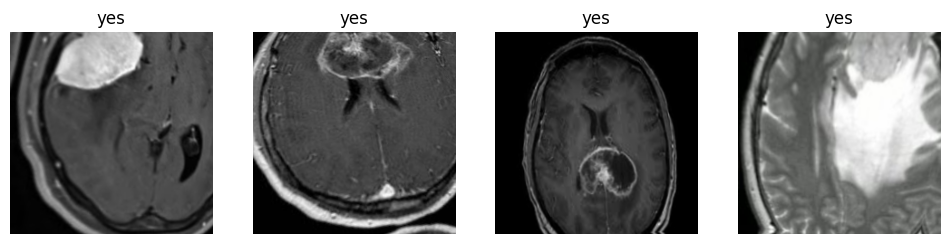

In [ ]:
dls = brainTumor.dataloaders(path)
dls.train.show_batch(max_n=4,nrows=1, unique=False)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.938151,0.800464,0.277228,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.695191,0.433385,0.178218,00:03
1,0.593642,0.368682,0.158416,00:02
2,0.492397,0.348367,0.089109,00:02
3,0.443693,0.326026,0.099010,00:02
4,0.394085,0.234535,0.079208,00:03
5,0.353306,0.202480,0.099010,00:03
6,0.323694,0.063459,0.019802,00:02
7,0.290267,0.023732,0.009901,00:02
8,0.257604,0.016016,0.009901,00:02
9,0.227223,0.014358,0.009901,00:03


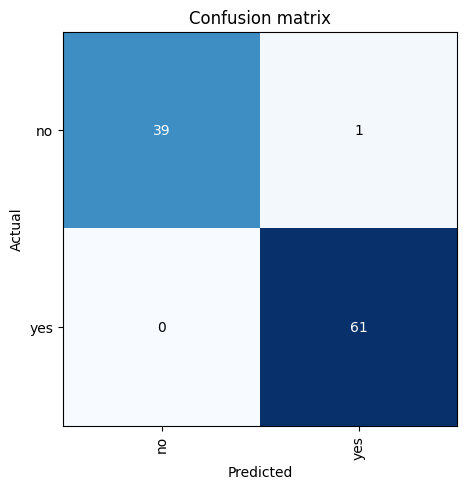

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

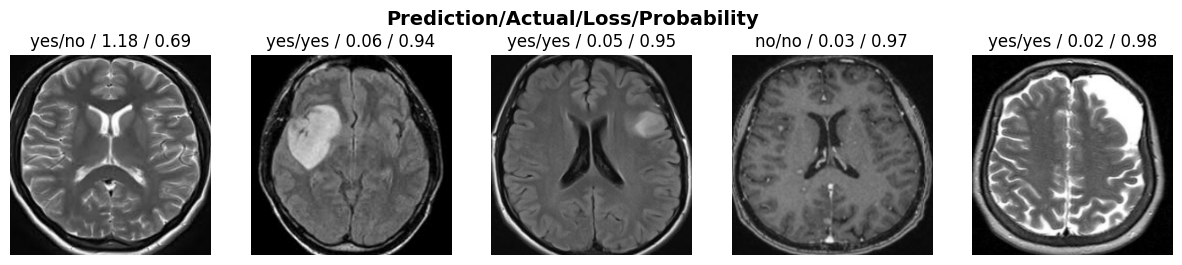

In [ ]:
interp.plot_top_losses(5, nrows=1)